In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

import numpy as np
import pandas as pd
from binascii import hexlify

In [2]:
f = open( 'XP01_LA_mwalk1.bin' , 'r' )

In [3]:
f.seek(0)

def get_next_second( f ):
    s = hexlify( f.read(458) )

    # If length is different than expected then we have
    # reached end of file
    if not( len(s) == 916 ):
        print "EOF",len(s)
        print s
        return s,False

    # Assert that header is formatted correctly
    if not( s[:12] == '010001020300' ):
        raise ValueError

    return s,True

def int_to_q( i ): return ( float(i) / 32767.5 ) - 1.0
def int_to_a( i ): return ( float(i) /1092.25 ) - 30.0 # in m/s^2

def get_bytes2( s ):
    return [ s[i:i+4] for i in range(20,916,4) ]

def get_measurement( bytes2 , imeasure ):
    # There are 7 words per measurement, so our word iterator
    # should start at imeasure * 7
    itr = imeasure * 7
    qvec = [ int_to_q( int(bytes2[i],16) ) for i in range(itr,itr+4) ]
    avec = [ int_to_a( int(bytes2[i],16) ) for i in range(itr+4,itr+7) ]
    return qvec + avec

def parse_second_pkt( s ):
    print s[:20]
    print s[:20:2]

data_list = []
for i in range(15):
    s , good = get_next_second( f )
    b = get_bytes2( s )
    data_list += [ get_measurement(b,imeas) for imeas in range(32) ]

len(data_list)

480

In [4]:
df = pd.DataFrame( data_list , columns=['q0','q1','q2','q3','a_x','a_y','a_z'] )
df['seconds'] = np.linspace( 0.0 , 15.0 , 480 )
df

,q0,q1,q2,q3,a_x,a_y,a_z,seconds
0,0.022202,0.494774,0.448386,-0.744076,-2.398260,-0.978256,0.234836,0.000000
1,0.011704,0.489464,0.448264,-0.747890,-3.015335,-0.932479,-1.491875,0.031315
2,0.002487,0.484154,0.449027,-0.750973,-3.336690,2.346075,-0.536049,0.062630
3,0.008347,-0.479271,-0.447868,0.754757,-3.408103,3.459373,-0.690776,0.093946
4,0.019181,-0.475151,-0.444266,0.759243,-3.306477,4.084688,-0.348363,0.125261
5,0.030137,-0.470848,-0.443290,0.762142,-3.327535,3.777066,0.129549,0.156576
6,0.040635,-0.466728,-0.442557,0.764614,-1.445182,4.370336,1.584344,0.187891
7,0.051713,-0.462394,-0.440940,0.767514,-1.276722,5.619135,3.588464,0.219207
8,0.064073,-0.457511,-0.438834,0.770718,-1.555047,4.686198,3.161822,0.250522
9,0.076799,-0.451896,-0.438224,0.773190,-1.888304,4.097505,3.162737,0.281837


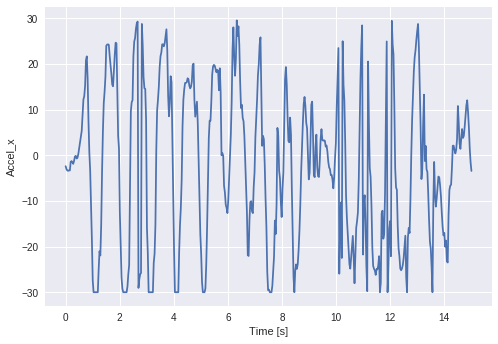

In [5]:
plt.plot( df['seconds'] , df['a_x'] )
plt.xlabel( 'Time [s]' )
plt.ylabel( 'Accel_x' )